In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex

In [2]:
qr = QuantumRegister(3, name='q')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
teleportation_circuit = QuantumCircuit(qr, crz, crx)

In [3]:
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a,b)

In [4]:
qr = QuantumRegister(3, name='q')
crz, crx = ClassicalRegister(1, name='crz'), ClassicalRegister(1, name='crx')
teleportation_circuit = QuantumCircuit(qr, crz, crx)

create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw()

q_0: ──────────
       ┌───┐     
  q_1: ┤ H ├──■──
       └───┘┌─┴─┐
  q_2: ─────┤ X ├
            └───┘
crz: 1/══════════
                 
crx: 1/══════════

In [5]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

In [6]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

create_bell_pair(teleportation_circuit, 1, 2)

teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw()

░      ┌───┐
  q_0: ───────────░───■──┤ H ├
       ┌───┐      ░ ┌─┴─┐└───┘
  q_1: ┤ H ├──■───░─┤ X ├─────
       └───┘┌─┴─┐ ░ └───┘     
  q_2: ─────┤ X ├─░───────────
            └───┘ ░           
crz: 1/═══════════════════════
                              
crx: 1/═══════════════════════

In [7]:
def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [8]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

create_bell_pair(teleportation_circuit, 1, 2)

teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)

measure_and_send(teleportation_circuit, 0, 1)
teleportation_circuit.draw()

░      ┌───┐ ░ ┌─┐   
  q_0: ───────────░───■──┤ H ├─░─┤M├───
       ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘
  q_2: ─────┤ X ├─░────────────░──╫──╫─
            └───┘ ░            ░  ║  ║ 
crz: 1/═══════════════════════════╩══╬═
                                  0  ║ 
                                     ║ 
crx: 1/══════════════════════════════╩═
                                     0

In [9]:
def bob_gates(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1)
    qc.z(qubit).c_if(crz, 1)

In [10]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

create_bell_pair(teleportation_circuit, 1, 2)

teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 1, 0)

measure_and_send(teleportation_circuit, 0, 1)

teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw()

░ ┌───┐      ░ ┌─┐    ░               
  q_0: ───────────░─┤ X ├──────░─┤M├────░───────────────
       ┌───┐      ░ └─┬─┘┌───┐ ░ └╥┘┌─┐ ░               
  q_1: ┤ H ├──■───░───■──┤ H ├─░──╫─┤M├─░───────────────
       └───┘┌─┴─┐ ░      └───┘ ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
  q_2: ─────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
            └───┘ ░            ░  ║  ║  ░  └─┬─┘  └─┬─┘ 
                                  ║  ║       │   ┌──┴──┐
crz: 1/═══════════════════════════╩══╬═══════╪═══╡ = 1 ╞
                                  0  ║    ┌──┴──┐└─────┘
crx: 1/══════════════════════════════╩════╡ = 1 ╞═══════
                                     0    └─────┘

<IPython.core.display.Math object>

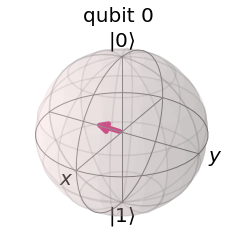

In [11]:
psi = random_state(1)

array_to_latex(psi, pretext='|\\psi\\rangle =')

plot_bloch_multivector(psi)

In [12]:
init_gate = Initialize(psi)
init_gate.label = 'init'

In [13]:
qr = QuantumRegister(3, name='q')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
qc = QuantumCircuit(qr, crz, crx)

qc.append(init_gate, [0])
qc.barrier()

create_bell_pair(qc, 1, 2)
qc.barrier()

alice_gates(qc, 0, 1)

measure_and_send(qc, 0, 1)

bob_gates(qc, 2, crz, crx)

qc.draw()

┌──────┐ ░            ░      ┌───┐ ░ ┌─┐                 
  q_0: ┤ init ├─░────────────░───■──┤ H ├─░─┤M├─────────────────
       └──────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐              
  q_1: ─────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──────────────
                ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ 
  q_2: ─────────░──────┤ X ├─░────────────░──╫──╫──┤ X ├──┤ Z ├─
                ░      └───┘ ░            ░  ║  ║  └─┬─┘  └─┬─┘ 
                                             ║  ║    │   ┌──┴──┐
crz: 1/══════════════════════════════════════╩══╬════╪═══╡ = 1 ╞
                                             0  ║ ┌──┴──┐└─────┘
crx: 1/═════════════════════════════════════════╩═╡ = 1 ╞═══════
                                                0 └─────┘

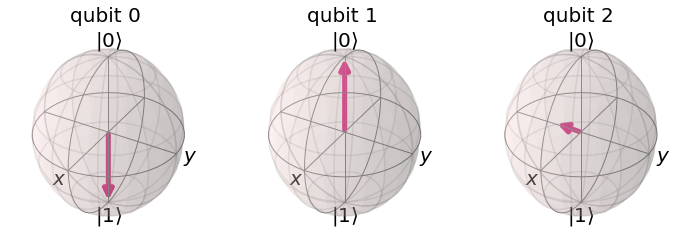

In [14]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

In [15]:
inverse_init_gate = init_gate.gates_to_uncompute()

In [16]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

## STEP 5
# reverse the initialization process
qc.append(inverse_init_gate, [2])

# Display the circuit
qc.draw()

┌──────┐ ░            ░      ┌───┐ ░ ┌─┐                 »
  q_0: ┤ init ├─░────────────░───■──┤ H ├─░─┤M├─────────────────»
       └──────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐              »
  q_1: ─────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──────────────»
                ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ »
  q_2: ─────────░──────┤ X ├─░────────────░──╫──╫──┤ X ├──┤ Z ├─»
                ░      └───┘ ░            ░  ║  ║  └─┬─┘  └─┬─┘ »
                                             ║  ║    │   ┌──┴──┐»
crz: 1/══════════════════════════════════════╩══╬════╪═══╡ = 1 ╞»
                                             0  ║ ┌──┴──┐└─────┘»
crx: 1/═════════════════════════════════════════╩═╡ = 1 ╞═══════»
                                                0 └─────┘       »
«                       
«  q_0: ────────────────
«                       
«  q_1: ────────────────
«       ┌──────────────┐
«  q_2: ┤ disentangler ├
«       └──────────────┘
«crz: 1/════════════════
«                       
«crx: 1/════════════════
«

In [17]:
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw()

┌──────┐ ░            ░      ┌───┐ ░ ┌─┐                 »
  q_0: ┤ init ├─░────────────░───■──┤ H ├─░─┤M├─────────────────»
       └──────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐              »
  q_1: ─────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──────────────»
                ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ »
  q_2: ─────────░──────┤ X ├─░────────────░──╫──╫──┤ X ├──┤ Z ├─»
                ░      └───┘ ░            ░  ║  ║  └─┬─┘  └─┬─┘ »
                                             ║  ║    │   ┌──┴──┐»
crz: 1/══════════════════════════════════════╩══╬════╪═══╡ = 1 ╞»
                                             0  ║ ┌──┴──┐└─────┘»
crx: 1/═════════════════════════════════════════╩═╡ = 1 ╞═══════»
                                                0 └─────┘       »
 c0: 1/═════════════════════════════════════════════════════════»
                                                                »
«                          
«  q_0: ───────────────────
«                          
«  q_1: ───────────────────
«       ┌──────────────┐┌─┐
«  q_2: ┤ disentangler ├┤M├
«       └──────────────┘└╥┘
«crz: 1/═════════════════╬═
«                        ║ 
«crx: 1/═════════════════╬═
«                        ║ 
« c0: 1/═════════════════╩═
«                        0

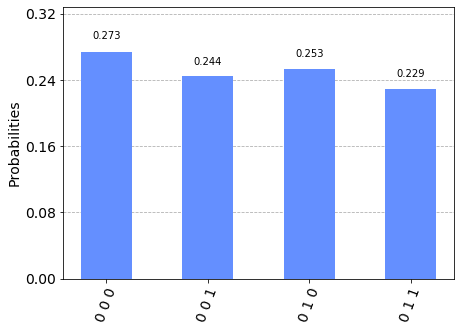

In [18]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=1024).result().get_counts()
plot_histogram(counts)

In [19]:
def new_bob_gates(qc, a, b, c):
    qc.cx(b,c)
    qc.cz(a,c)

In [20]:
qc = QuantumCircuit(3,1)

# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)
qc.barrier()
# Alice sends classical bits to Bob
new_bob_gates(qc, 0, 1, 2)

# We undo the initialization process
qc.append(inverse_init_gate, [2])

# See the results, we only care about the state of qubit 2
qc.measure(2,0)

# View the results:
qc.draw()

┌──────┐ ░            ░      ┌───┐ ░                            
q_0: ┤ init ├─░────────────░───■──┤ H ├─░───────■────────────────────
     └──────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░       │                    
q_1: ─────────░─┤ H ├──■───░─┤ X ├──────░───■───┼────────────────────
              ░ └───┘┌─┴─┐ ░ └───┘      ░ ┌─┴─┐ │ ┌──────────────┐┌─┐
q_2: ─────────░──────┤ X ├─░────────────░─┤ X ├─■─┤ disentangler ├┤M├
              ░      └───┘ ░            ░ └───┘   └──────────────┘└╥┘
c: 1/══════════════════════════════════════════════════════════════╩═
                                                                   0

In [21]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

In [22]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and not b.configuration().simulator and b.status().operational==True))
job_exp = execute(qc, backend=backend, shots=8192)

Job Status: job has successfully run
{'0': 6892, '1': 1300}


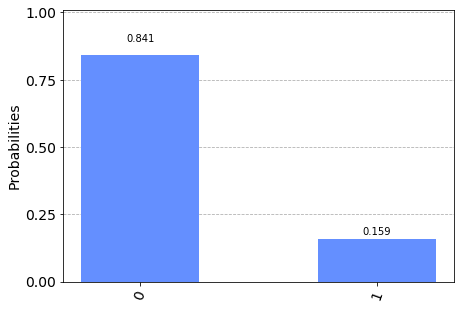

In [23]:
from qiskit.tools.monitor import job_monitor
job_monitor(job_exp)  # displays job status under cell

# Get the results and display them
exp_result = job_exp.result()
exp_measurement_result = exp_result.get_counts(qc)
print(exp_measurement_result)
plot_histogram(exp_measurement_result)

In [24]:
error_rate_percent = sum([exp_measurement_result[result] for result in exp_measurement_result.keys() if result[0]=='1']) \
                    * 100./ sum(list(exp_measurement_result.values()))
print("The experimental error rate : ", error_rate_percent, "%")

The experimental error rate :  15.869140625 %
